Sample mean: 20.27777777777778
Sample variance: 16.683006535947726
Sum of Xt*Xt+1 where t=[1, 18]: 7112
lag-1 autocovariance: 7.164669571532293
autocorrelation: 0.42945913592338486
mu: 0.049315068493150684

Histogram for EAR(1) model


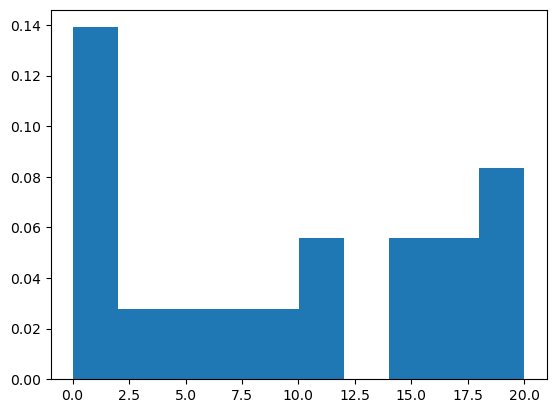

In [55]:
import numpy
import random
import math
from matplotlib import pyplot as plt
# sample_mean = sum(sample) / len(sample)
# sample_variance = (sum([sample[x] ** 2 for x in range(len(sample))]) - len(sample) * (sample_mean ** 2)) / (len(sample) - 1)
#Start with the sample mean and variance
sample = [20,14,21,19,14,18,21,25,27,26,22,18,13,18,25,23,20,21]
sample_mean = sum(sample) / len(sample)
sample_variance = (sum([sample[x] ** 2 for x in range(len(sample))]) - len(sample) * (sample_mean ** 2)) / (len(sample) - 1)
print(f"Sample mean: {sample_mean}\nSample variance: {sample_variance}")
#lag-1 autocorrelation
sum_product = sum([sample[x]*sample[x+1] for x in range(len(sample)-1)])
print(f"Sum of Xt*Xt+1 where t=[1, 18]: {sum_product}")
cov = (sum_product - (len(sample)-1)*((sample_mean) ** 2)) / (len(sample)-1)
print(f"lag-1 autocovariance: {cov}")
p = cov / sample_variance
print(f"autocorrelation: {p}")
print(f"mu: {1/sample_mean}\n")

#prepare for hisogram
ear_sample = []
numpy.random.seed(1)
random.seed(1)
t=2
x1 = numpy.random.exponential(scale=1.0/sample_mean)
ear_sample.append(x1) #generate x1 
xt = x1
while t < 19:
    u = numpy.random.uniform() #generate U from uniform distribution in the range of [0,1]
    if u <= p: #xt = p * xt-1 when u <= p
        x_plus = p * xt
        ear_sample.append(x_plus)
        xt = x_plus
        t += 1
    else: #xt = mean + p(xt-1 - mean) + beta(generated from exponential function)
        x_plus = sample_mean + p * (xt - sample_mean) + numpy.random.exponential(scale=1.0/sample_mean)
        ear_sample.append(x_plus)
        xt = x_plus
        t += 1
print("Histogram for EAR(1) model")
plt.hist(x=ear_sample, density=True)
plt.show()

Sample mean: 20.27777777777778
Sample variance: 16.683006535947726
Sum of Xt*Xt+1 where t=[1, 18]: 7112
lag-1 autocovariance: 7.164669571532293
variance for AR(1) model: 13.6060737325809
autocorrelation: 0.42945913592338486
mu: 20.27777777777778

Histogram for AR(1) model


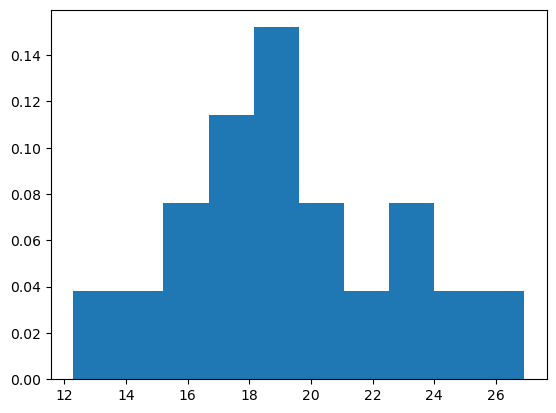

Comparing 2 histograms, AR model fits better considering there are no visible gaps between intervals and it's more close to the normal distribution.


In [56]:
#AR model
#we will use the sample mean, variance, sum_product, covariance, and p from the EAR model calculation since both use these stats
ar_p = p #share the same covariance and sample variance
ar_variance = sample_variance * (1 - (ar_p ** 2))
ar_mu = sample_mean
print(f"Sample mean: {sample_mean}\nSample variance: {sample_variance}")
print(f"Sum of Xt*Xt+1 where t=[1, 18]: {sum_product}")
print(f"lag-1 autocovariance: {cov}")
print(f"variance for AR(1) model: {ar_variance}")
print(f"autocorrelation: {ar_p}")
print(f"mu: {ar_mu}\n")
ar_sample = []

normal_sd = (ar_variance / (1 - (ar_p ** 2))) ** 0.5 #standard deviation for generating X1 from normal distribution
numpy.random.seed(1)
xt = numpy.random.normal(loc=ar_mu, scale=normal_sd)
ar_sample.append(xt)
t=2
while t < 19: #repeat until t=19
    x_plus = ar_mu + ar_p * (xt - ar_mu) + numpy.random.normal(loc=0, scale=(ar_variance**0.5))
    ar_sample.append(x_plus)
    xt = x_plus
    t += 1
print("Histogram for AR(1) model")
plt.hist(x=ar_sample, density=True)
plt.show()
print("Comparing 2 histograms, AR model fits better considering there are no visible gaps between intervals and it's more close to the normal distribution.")